## EXPLORATORY DATA ANALYSIS OF BROOKLYIN PROPERTIES BETWEEN FROM 2003 TO 2017.
### The importance of this exploratory analysis for this dataset is to uncover some insights which include:
To uncover pricey and cheap Neighborhoods to buy family homes and commercial properties in brooklyn.
To identify both expensive and cheap geographical region of brooklyn to buy properties.
To visualize seasonality in the properties purchase in brooklyn between 2003 and 2017.

In [18]:
#Importing the require libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
full_sale = pd.read_csv("full_sale.csv")

In [7]:
full_sale.head()

,Unnamed: 0,neighborhood,building_class_category,tax_class_at_sale,building_class_at_sale,address,sale_price,sale_date,year_of_sale,land_sqft,gross_sqft,OwnerName,month,month_number,month_name,geographical_region,mins_to_manhattan_bridge
0,0,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,R5,330 JAY STREET,499401179.0,2008-04-23,2008,0.0,0.0,Anonymous,4,4,April,Northwestern Brooklyn,3
1,1,DUMBO,29 COMMERCIAL GARAGES,4,G7,85 JAY STREET,345000000.0,2016-12-20,2016,134988.0,0.0,85 JAY STREET BROOKLY,12,12,December,Northwestern Brooklyn,4
2,2,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,O6,29 COLUMBIA HEIGHTS,340000000.0,2016-08-03,2016,32000.0,304650.0,25-30 COLUMBIA HEIGHT,8,8,August,Northwestern Brooklyn,7
3,3,MILL BASIN,22 STORE BUILDINGS,4,K6,5120 AVENUE U,276947000.0,2012-11-28,2012,905000.0,2548000.0,BROOKLYN KINGS PLAZA,11,11,November,Southern Brooklyn,33
4,4,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,H8,21 CLARK STREET,202500000.0,2017-10-31,2017,20267.0,356000.0,WATCHTOWER C/O REAL P,10,10,October,Northwestern Brooklyn,7


In [9]:
# dropping the month number column
full_sale.drop(['month_number'], axis=1, inplace=True)

In [10]:
full_sale.head()

,Unnamed: 0,neighborhood,building_class_category,tax_class_at_sale,building_class_at_sale,address,sale_price,sale_date,year_of_sale,land_sqft,gross_sqft,OwnerName,month,month_name,geographical_region,mins_to_manhattan_bridge
0,0,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,R5,330 JAY STREET,499401179.0,2008-04-23,2008,0.0,0.0,Anonymous,4,April,Northwestern Brooklyn,3
1,1,DUMBO,29 COMMERCIAL GARAGES,4,G7,85 JAY STREET,345000000.0,2016-12-20,2016,134988.0,0.0,85 JAY STREET BROOKLY,12,December,Northwestern Brooklyn,4
2,2,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,O6,29 COLUMBIA HEIGHTS,340000000.0,2016-08-03,2016,32000.0,304650.0,25-30 COLUMBIA HEIGHT,8,August,Northwestern Brooklyn,7
3,3,MILL BASIN,22 STORE BUILDINGS,4,K6,5120 AVENUE U,276947000.0,2012-11-28,2012,905000.0,2548000.0,BROOKLYN KINGS PLAZA,11,November,Southern Brooklyn,33
4,4,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,H8,21 CLARK STREET,202500000.0,2017-10-31,2017,20267.0,356000.0,WATCHTOWER C/O REAL P,10,October,Northwestern Brooklyn,7


In [11]:
full_sale.shape

(390876, 16)

In [12]:
full_sale.isnull().sum()

Unnamed: 0                  0
neighborhood                0
building_class_category     0
tax_class_at_sale           0
building_class_at_sale      0
address                     0
sale_price                  0
sale_date                   0
year_of_sale                0
land_sqft                   0
gross_sqft                  0
OwnerName                   0
month                       0
month_name                  0
geographical_region         0
mins_to_manhattan_bridge    0
dtype: int64

## 1. LANDING PROPERTIES ANALYSIS
The approach is to extract the landing properties in the dataset so we can highlight the neigborhood with expensive landing properties, which will give us an insight regarding where to get cheap lands that fit into our budget.

First we need to set a price baseline of 50,000 USD of lands purchased from 2003 to 2017 due to some low sale_price which we consider to be unclear, then group by brooklyn distinct geographical region in the dataframe and map each geographical region to it's average sale price of the lands.

In [13]:
vacant_land = full_sale.loc[(full_sale["building_class_at_sale"] == "V0") & (full_sale["sale_price"] >= 50000)]
vacant_land.head()

,Unnamed: 0,neighborhood,building_class_category,tax_class_at_sale,building_class_at_sale,address,sale_price,sale_date,year_of_sale,land_sqft,gross_sqft,OwnerName,month,month_name,geographical_region,mins_to_manhattan_bridge
63,63,WILLIAMSBURG,05 TAX CLASS 1 VACANT LAND,1,V0,KENT AVENUE,65600000.0,2012-08-30,2012,75707.0,522607.0,"NORTH 4TH PLACE, LLC",8,August,Northern Brooklyn,10
70,70,GREENPOINT,05 TAX CLASS 1 VACANT LAND,1,V0,COMMERCIAL STREET,59757356.0,2015-10-19,2015,5293.0,0.0,BOP GREENPOINT F LLC,10,October,Northern Brooklyn,12
111,111,GREENPOINT,05 TAX CLASS 1 VACANT LAND,1,V0,COMMERCIAL STREET,46485643.0,2015-10-19,2015,14284.0,0.0,BOP GREENPOINT G LLC,10,October,Northern Brooklyn,12
130,130,WILLIAMSBURG,05 TAX CLASS 1 VACANT LAND,1,V0,44 SOUTH 8TH STREET,42565000.0,2007-12-11,2007,95275.0,43370.0,Anonymous,12,December,Northern Brooklyn,10
167,167,SPRING CREEK,05 TAX CLASS 1 VACANT LAND,1,V0,VANDALIA AVENUE,35000000.0,2013-02-13,2013,2574982.0,0.0,NYC PARKS,2,February,Eastern Brooklyn,35


In [14]:
land_avg_price = vacant_land.groupby("geographical_region")["sale_price"].median().reset_index().sort_values("sale_price",ascending = False).rename(columns=({"sale_price":
                                                                                                                         "median_sale_price"}))

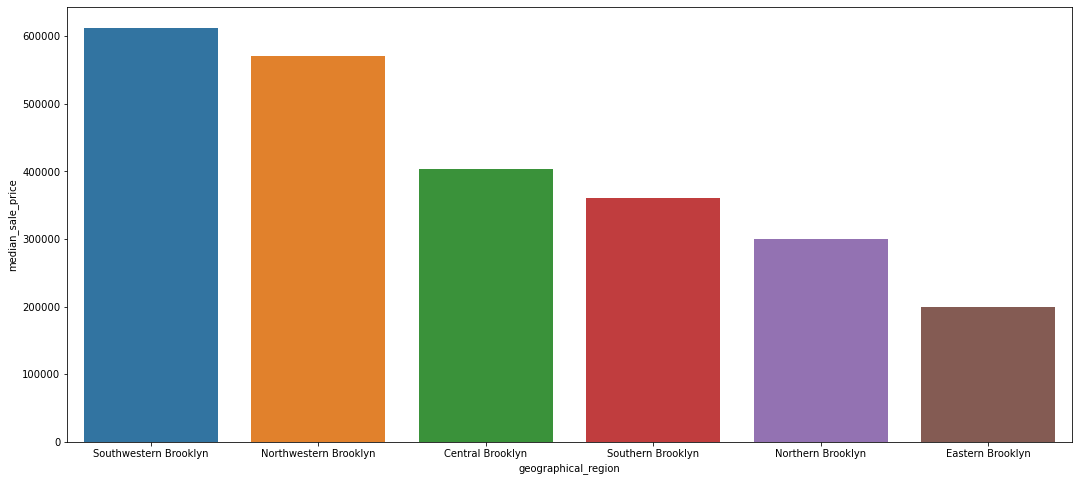

In [19]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(land_avg_price["geographical_region"], land_avg_price["median_sale_price"])
plt.ticklabel_format(axis="y", style="plain")

Looking at the plot of the 6 geographical locations in brooklyn above, it's evident that landing property sale price in southwestern and northwestern part of brooklyn are the most expensive , contrary to eastern and northern part being the least expensive in the borough.

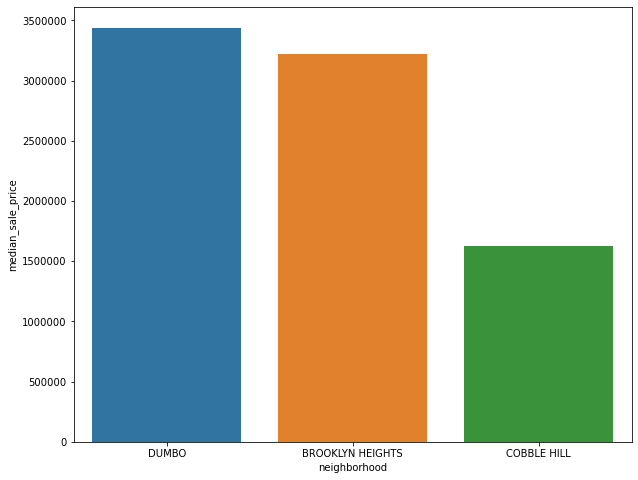

In [21]:
land_avg_price = vacant_land.groupby("neighborhood")["sale_price"].median().reset_index().sort_values("sale_price", 
                                                                                                      ascending =False).rename(columns=({"sale_price":
                                                                                                                                         "median_sale_price"})).head(3)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(land_avg_price["neighborhood"], land_avg_price["median_sale_price"])
plt.ticklabel_format(axis="y", style="plain")

The bar plot above shows the median sale price of lands in different neighborhood in brooklyn. The 3 most expensive neighborhood in terms of landing property are Cobble hill with over 4,000,000 USD while Dumbo and Brookln heights with 3,400,000 USD and 3,200,000 USD respectively.

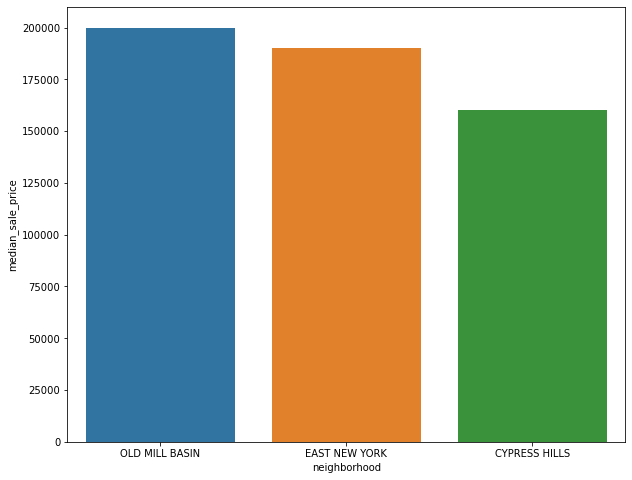

In [22]:
land_avg_price = vacant_land.groupby("neighborhood")["sale_price"].median().reset_index().sort_values("sale_price", 
                                                                                                      ascending =False).rename(columns=({"sale_price":
                                                                                                                                         "median_sale_price"})).tail(3)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(land_avg_price["neighborhood"], land_avg_price["median_sale_price"])
plt.ticklabel_format(axis="y", style="plain")

### SETTING 100K+ THRESHOLD FOR SALE_PRICE
- Lots of property sales are below one thousand dollars and many low sale prices, which does not reflect the actual price of this big properties, based on this unclarity of the price,we decided to set a price baseline to get properties above 100000 USD.

In [23]:
properties_over_100k = full_sale.loc[full_sale["sale_price"] > 100000]

In [24]:
#saving the dataframe where sale_price is over 100k to .csv so it can be used for visualization purposes later
properties_over_100k.to_csv("tableau_data.csv")

In [25]:
properties_over_100k.head()

,Unnamed: 0,neighborhood,building_class_category,tax_class_at_sale,building_class_at_sale,address,sale_price,sale_date,year_of_sale,land_sqft,gross_sqft,OwnerName,month,month_name,geographical_region,mins_to_manhattan_bridge
0,0,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,R5,330 JAY STREET,499401179.0,2008-04-23,2008,0.0,0.0,Anonymous,4,April,Northwestern Brooklyn,3
1,1,DUMBO,29 COMMERCIAL GARAGES,4,G7,85 JAY STREET,345000000.0,2016-12-20,2016,134988.0,0.0,85 JAY STREET BROOKLY,12,December,Northwestern Brooklyn,4
2,2,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,O6,29 COLUMBIA HEIGHTS,340000000.0,2016-08-03,2016,32000.0,304650.0,25-30 COLUMBIA HEIGHT,8,August,Northwestern Brooklyn,7
3,3,MILL BASIN,22 STORE BUILDINGS,4,K6,5120 AVENUE U,276947000.0,2012-11-28,2012,905000.0,2548000.0,BROOKLYN KINGS PLAZA,11,November,Southern Brooklyn,33
4,4,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,H8,21 CLARK STREET,202500000.0,2017-10-31,2017,20267.0,356000.0,WATCHTOWER C/O REAL P,10,October,Northwestern Brooklyn,7


In [27]:
region_average_price = properties_over_100k.groupby("geographical_region")["sale_price"].median().reset_index().sort_values("sale_price", ascending=False).rename(columns=({"sale_price":"median_sale_price"}))

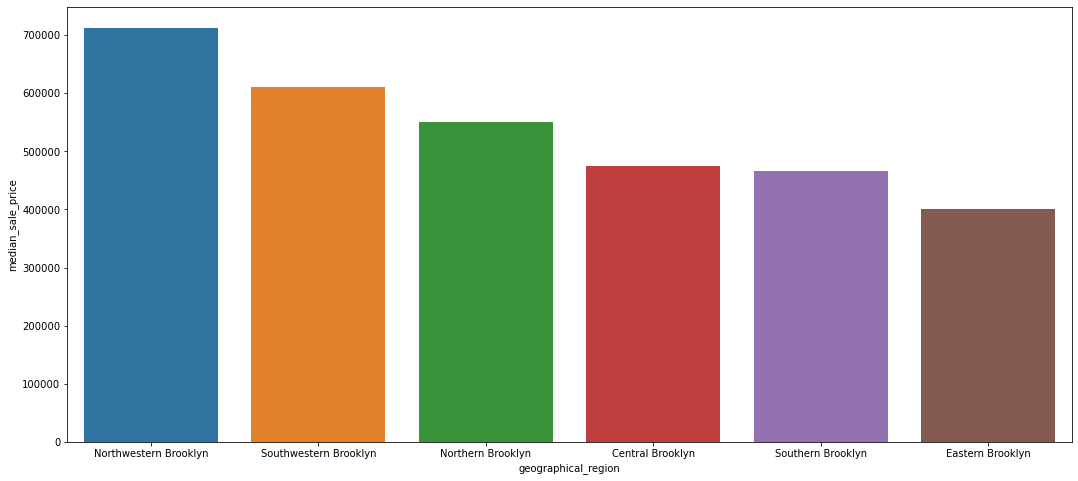

In [28]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(region_average_price["geographical_region"], region_average_price["median_sale_price"])
plt.ticklabel_format(axis="y", style="plain")

The above barplot shows again that properties (land inclusive) in the Northwestern and southwestern parts of Brooklyn are the most expensive.


### RESIDENTIAL PROPERTIES ANALYSIS
Residential homes are constantly in high demand all over the world, places like Brooklyn, NY is no exception and its certain the volume of the demand will be huge, However, knowing the median prices of some regions and neighborhoods in the borough of Brooklyn can be impactful in the property hunt which is why we are going to extract all residential homes which all lie in the tax class 1.

In [29]:
class_1 = properties_over_100k.loc[properties_over_100k["tax_class_at_sale"] == 1]

In [30]:
class_1["building_class_category"].value_counts()

02 TWO FAMILY HOMES            60666
01 ONE FAMILY HOMES            33247
03 THREE FAMILY HOMES          20823
04  TAX CLASS 1 CONDOS          6137
05  TAX CLASS 1 VACANT LAND     2574
04 TAX CLASS 1 CONDOS            425
06  TAX CLASS 1 - OTHER          248
05 TAX CLASS 1 VACANT LAND       120
06 TAX CLASS 1 - OTHER            13
Name: building_class_category, dtype: int64

In [31]:
#we decided to take the first 3 values being the most dominance
family_homes = class_1.loc[(class_1["building_class_category"] == '01 ONE FAMILY HOMES') | 
                           (class_1["building_class_category"] == "02 TWO FAMILY HOMES") |
                           (class_1["building_class_category"] == "03 THREE FAMILY HOMES")]

In [32]:
family_homes.head()

,Unnamed: 0,neighborhood,building_class_category,tax_class_at_sale,building_class_at_sale,address,sale_price,sale_date,year_of_sale,land_sqft,gross_sqft,OwnerName,month,month_name,geographical_region,mins_to_manhattan_bridge
316,316,BOERUM HILL,02 TWO FAMILY HOMES,1,S2,525 ATLANTIC AVENUE,23000000.0,2013-05-01,2013,2000.0,4225.0,THOR ATLANTIC GARDENS,5,May,Northwestern Brooklyn,10
389,389,GOWANUS,02 TWO FAMILY HOMES,1,S2,470 4TH AVENUE,20000000.0,2014-02-04,2014,15120.0,46000.0,470 4TH AVENUE INVEST,2,February,Northwestern Brooklyn,11
398,398,PARK SLOPE,03 THREE FAMILY HOMES,1,C0,555 4 AVENUE,19875000.0,2016-06-30,2016,1800.0,2700.0,PARTNERS VII/541-555,6,June,Northwestern Brooklyn,15
469,469,GREENPOINT,02 TWO FAMILY HOMES,1,S2,1050 MANHATTAN AVENUE,18000000.0,2015-08-25,2015,2500.0,3000.0,MANHATTAN EAGLE LLC,8,August,Northern Brooklyn,12
576,576,COBBLE HILL,01 ONE FAMILY HOMES,1,A9,177 PACIFIC STREET,15500000.0,2015-05-29,2015,2513.0,10000.0,"ARCHIVAL, INC.",5,May,Northwestern Brooklyn,6


In [33]:
family_homes.building_class_category.value_counts()

02 TWO FAMILY HOMES      60666
01 ONE FAMILY HOMES      33247
03 THREE FAMILY HOMES    20823
Name: building_class_category, dtype: int64

In [35]:
# grouping by neighborhood to show the priciest neighborhood
neighborhood_avg_price_class_1 = family_homes.groupby("neighborhood")["sale_price"].median().round(0).reset_index().sort_values("sale_price", ascending = False).head(3)

In [36]:
neighborhood_avg_price_class_1 = neighborhood_avg_price_class_1.rename(columns=({"sale_price":"median_sale_price"}))

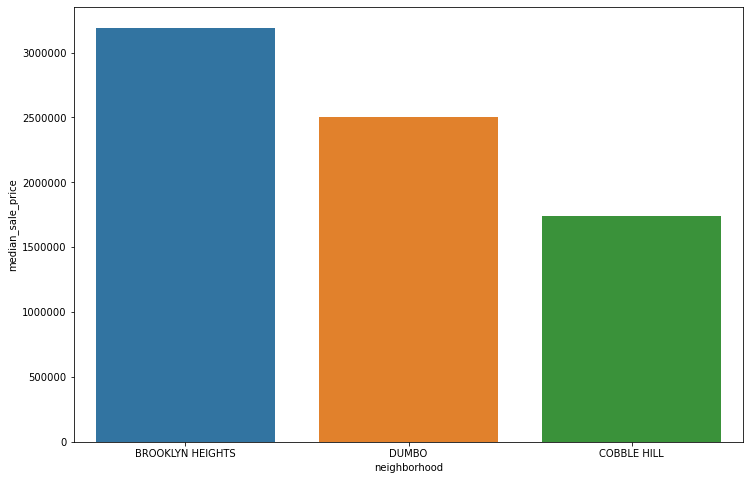

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(neighborhood_avg_price_class_1["neighborhood"], neighborhood_avg_price_class_1["median_sale_price"])
plt.ticklabel_format(axis="y", style="plain")

The visualization above again demonstrate how residential properties in Brooklyn heights, Dumbo and Cobble hill neighborhood are expensive to aquire and it's not suprising because the neighborhoods are all in the Northwestern part of Brooklyn, with the median sale price of residential homes at 3,000,000 USD, 2,500,000 USD and 2,100,000 USD respectively. In addition, Brooklyn height is an affluent residential neighborhood, Dumbo is known for its large community of tech startups and Cobble hill currently emerged as the most expensive neighborhood in Brooklyn in 2020 reflects the reason for the residential properties sale price dominancy in Brooklyn.

In [39]:
# grouping by neighborhood to show cheapest neighborhood
neighborhood_avg_price_class_1 = family_homes.groupby("neighborhood")["sale_price"].median().round(0).reset_index().sort_values("sale_price", ascending = False).tail(3)

In [40]:
neighborhood_avg_price_class_1 = neighborhood_avg_price_class_1.rename(columns=({"sale_price":"median_sale_price"}))

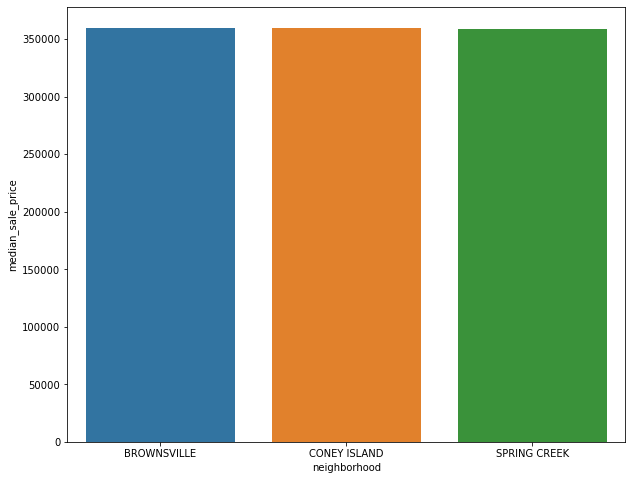

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(neighborhood_avg_price_class_1["neighborhood"], neighborhood_avg_price_class_1["median_sale_price"])
plt.ticklabel_format(axis="y", style="plain")


Coney island, Brownsville and Spring Creek are the cheapest neigborhood in Brooklyn with the three neighborhoods median sale price just around $350,000


### COMMERCIAL PROPERTIES ANALYSIS

Commercial properties are important properties in the real estate and important properties that boost economy of a country, with New york one of the most dominant state in the United state with Commercial buildings used for different business purposes. It's important to visualize and uncover the neighborhoods with the priciest commercial properties which fall under the tax class 4 in Brooklyn.


In [43]:
class_4 = properties_over_100k.loc[properties_over_100k["tax_class_at_sale"] == 4]

In [44]:
class_4.head()

,Unnamed: 0,neighborhood,building_class_category,tax_class_at_sale,building_class_at_sale,address,sale_price,sale_date,year_of_sale,land_sqft,gross_sqft,OwnerName,month,month_name,geographical_region,mins_to_manhattan_bridge
0,0,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,R5,330 JAY STREET,499401179.0,2008-04-23,2008,0.0,0.0,Anonymous,4,April,Northwestern Brooklyn,3
1,1,DUMBO,29 COMMERCIAL GARAGES,4,G7,85 JAY STREET,345000000.0,2016-12-20,2016,134988.0,0.0,85 JAY STREET BROOKLY,12,December,Northwestern Brooklyn,4
2,2,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,O6,29 COLUMBIA HEIGHTS,340000000.0,2016-08-03,2016,32000.0,304650.0,25-30 COLUMBIA HEIGHT,8,August,Northwestern Brooklyn,7
3,3,MILL BASIN,22 STORE BUILDINGS,4,K6,5120 AVENUE U,276947000.0,2012-11-28,2012,905000.0,2548000.0,BROOKLYN KINGS PLAZA,11,November,Southern Brooklyn,33
4,4,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,H8,21 CLARK STREET,202500000.0,2017-10-31,2017,20267.0,356000.0,WATCHTOWER C/O REAL P,10,October,Northwestern Brooklyn,7


In [45]:
neighborhood_avg_price_class_4 = class_4.groupby("neighborhood")["sale_price"].median().round(0).reset_index().sort_values("sale_price", ascending = False).head(3)

In [46]:
neighborhood_avg_price_class_4 = neighborhood_avg_price_class_4.rename(columns=({"sale_price":"median_sale_price"}))

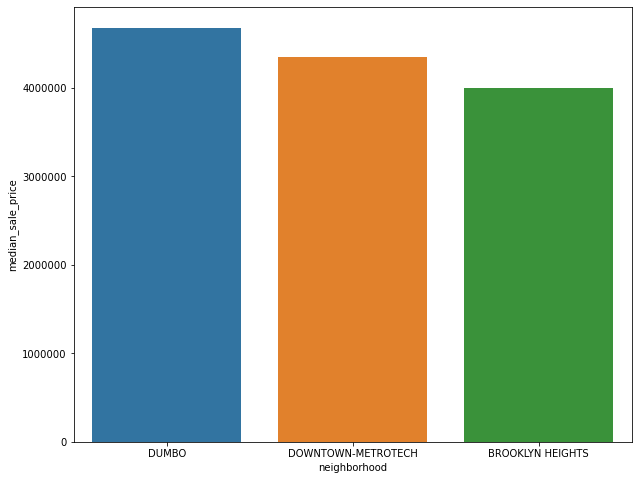

In [47]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(neighborhood_avg_price_class_4["neighborhood"], neighborhood_avg_price_class_4["median_sale_price"])
plt.ticklabel_format(axis="y", style="plain")

Dumbo neighborhood is the most expensive neighborhood to acquire a commercial building with its median sale price being around 4,500,000 USD, this is not surprising because Dumbo is known for its large community of tech startups.
Downtown metrotech in Downtown brooklyn come second with around 4,200,000 USD while brooklyn heights has median sale price of around 3,900,000 USD.

In [48]:
neighborhood_avg_price_class_4 = class_4.groupby("neighborhood")["sale_price"].median().round(0).reset_index().sort_values("sale_price", ascending = False).tail(3)

In [49]:
neighborhood_avg_price_class_4 = neighborhood_avg_price_class_4.rename(columns=({"sale_price":"median_sale_price"}))

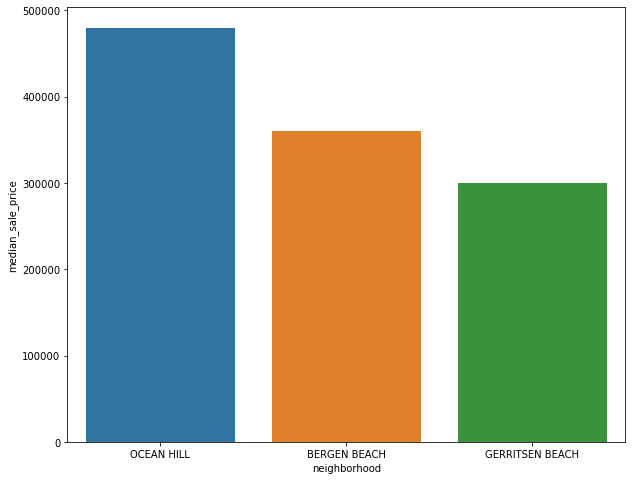

In [50]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(neighborhood_avg_price_class_4["neighborhood"], neighborhood_avg_price_class_4["median_sale_price"])
plt.ticklabel_format(axis="y", style="plain")


### VISUALIZING THE TREND OF MEDIAN SALE PRICE OF FAMILY HOMES IN BROOKLYN FROM 2003 TO 2017
The previous analysis and visualizations highlights the neigborhoods and geographical location with the priciest and cheapest to buy both residential and commercial properties and that already educate us of the location to go that fits an individual's budget. However, there are real estate experts or random individual who would like to buy a residential property with the aim of reselling in the future, but without knowing the yearly or monthly trend of sale price, it might be a disaster when reselling, this is why it's important to analyze the yearly and monthly trends respectively so as to know if the sale price of residential properties in Brooklyn in general is constantly increasing.


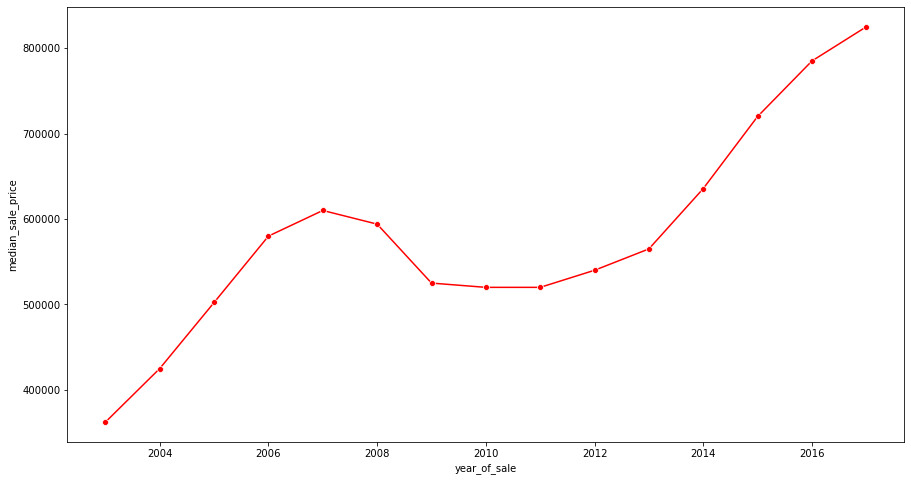

In [51]:
family_df = family_homes.groupby("year_of_sale")["sale_price"].median().reset_index().round(0).rename(columns=({"sale_price":"median_sale_price"}))
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(family_df["year_of_sale"], family_df["median_sale_price"], marker = "o", color="r")
plt.ticklabel_format(axis="y", style="plain")


The line plot above shows the yearly trend of the general properties sale in Brooklyn and we can see some interesting trend. The trend begin from 2003 to 2017, the median price in 2003 is below 400,000 USD and it continues to show an upward trend till 2007, surprisingly it starts to drop from 2007 till around 2009, the cause of the drop is as a result of the Great Recession https://en.wikipedia.org/wiki/Great_Recession that happend in late 2007 to mid 2009 which devastated real estate business in the United state. The real estate business recovery begin from 2010 which continue to increase slightly through 2013 and increases exponentially after 2013 until 2017 with over 800,000 USD median sale_price.


### VISUALIZING THE TREND OF AVERAGE SALE OF COMMERCIAL PROPERTIES IN BROOKLYN FROM 2003 TO 2017
Having visualize the yearly trend of the median sale price of residential properties in Brooklyin, it's important to examine the yearly trend of commercial properties as well, we all know there are constant increase in startups, business and numerous companies aquiring commercial properties for expansion and also real estate experts buying commercial buildings with plan of reselling as well.

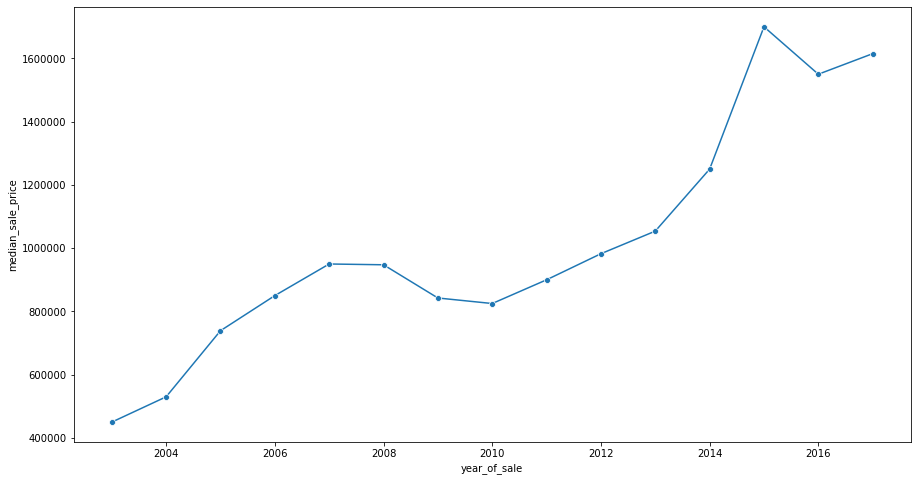

In [53]:
commercial_df = class_4.groupby("year_of_sale")["sale_price"].median().reset_index().round(0).rename(columns=({"sale_price":"median_sale_price"}))
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(commercial_df["year_of_sale"], commercial_df["median_sale_price"], marker = "o")
plt.ticklabel_format(axis="y", style="plain")


The above yearly trend of commercial building above is identical to the trend will uncover with the residential properties yearly trend. In 2003, the median sale price started a little above 1,000,000 USD and also continue to rise until after 2006 and this downward trend went up in 2008 but plumute deep in 2009 which is still as a result of the Great Recession, it continued to increase after 2010 until 2016 with over 6,000,000 USD in median price until it slightly decrease in 2017.

### INVESTIGATING THE BEST MONTH TO BUY PROPERTIES IN BROOKLYN
Looking at the monthly trend for each year can give a clue to which is the best month that people buy and sell their properties, this is crucial to know before planning to buy properties in brooklyn, we are going to check the trend only from 2014 to 2017 because that is when there was a stable increase in the yearly sales after the recession. The way to go around this is making a count of the total properties that is being sold all together including, lands, homes, commercial and even industrial properties for each month of each year.

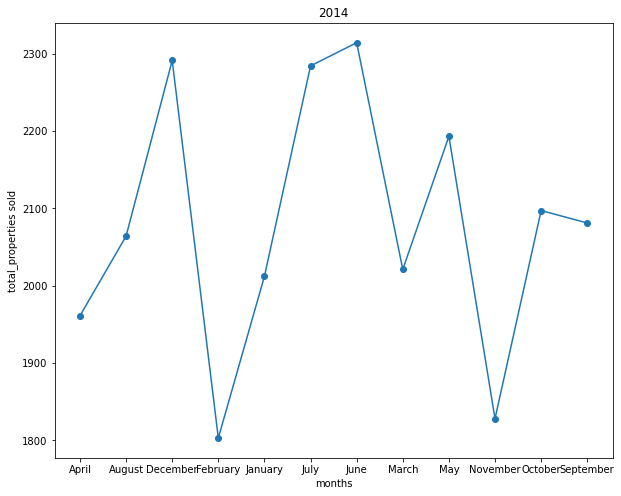

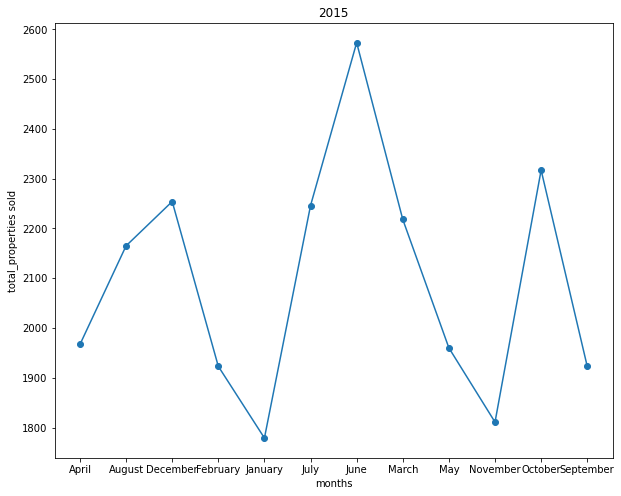

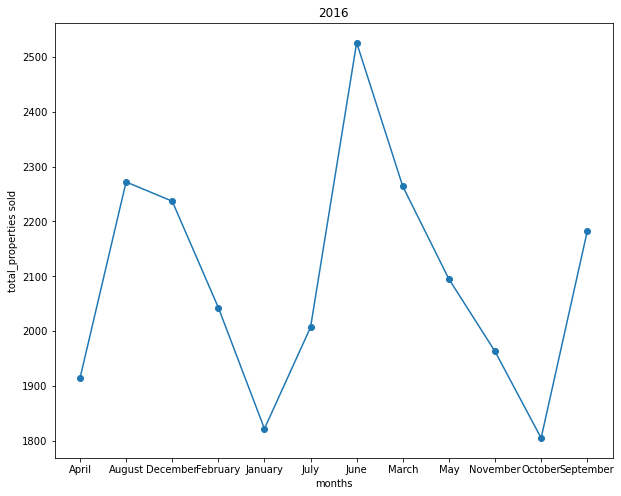

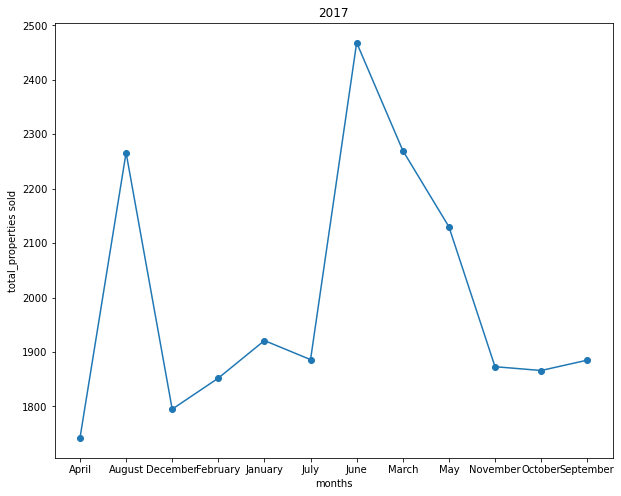

In [56]:
years = range(2014, 2018)
for year in years:
    month_sale = full_sale.loc[full_sale["year_of_sale"] == year].groupby("month_name")["sale_price"].count().reset_index()
    plt.figure(figsize=(10, 8))
    plt.plot(month_sale.month_name, month_sale.sale_price, marker="o")
    plt.xlabel("months")
    plt.ylabel("total_properties sold")
    plt.title(year)
    plt.show()

Interesting trend from the monthly plot of 2014 to 2017, its evident that the best time to buy properties in brooklyn is around June which obviously has the highest total number of properties sold from 2014 to 2017 with constant property sales of over 2300.